This notebook predicts the student scores based on the number of hours studied. The source of the dataset is from kaggle : https://www.kaggle.com/datasets/samira1992/student-scores-simple-dataset/data

The implementation is from scratch and then the same is compared with sklearn library's prediction.

In [1]:
## Import required modules
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [3]:
## Load dataset
df = pd.read_csv('Salary_Data.csv')
df.head()
X = np.array(df['YearsExperience'])
y = np.array(df['Salary'])

**Linear Regression from scratch**

In [5]:
## Initalise parameters
m, c = 0, 0
lr = 0.002
## Number of iterations can be decided based when our cost function value starts becoming constant.
epochs = 10000
n = len(X)

# Gradient descent
for i in range(epochs) :
  y_pred = m*X + c
  cost = (1/n)*sum([value**2 for value in (y-y_pred)])
  dm = (-2/n) * sum(X * (y-y_pred))
  dc = (-2/n) * sum(y - y_pred)
  m -= lr * dm
  c -= lr * dc
  print ("m {}, c {}, cost {}, iteration {}".format(m,c,cost, i))

print(f"From Scratch → m={m:.3f}, c={c:.3f}")

Streaming output truncated to the last 5000 lines.
m 9501.294267899322, c 25446.287835910513, cost 31296862.83869027, iteration 5001
m 9501.25083623141, c 25446.580510393116, cost 31296819.010742985, iteration 5002
m 9501.207441310782, c 25446.872937245505, cost 31296775.256929465, iteration 5003
m 9501.16408310635, c 25447.1651166772, cost 31296731.577124353, iteration 5004
m 9501.12076158705, c 25447.457048897537, cost 31296687.971202385, iteration 5005
m 9501.077476721839, c 25447.748734115685, cost 31296644.439038698, iteration 5006
m 9501.034228479708, c 25448.040172540626, cost 31296600.98050846, iteration 5007
m 9500.991016829668, c 25448.331364381174, cost 31296557.595487144, iteration 5008
m 9500.947841740759, c 25448.622309845963, cost 31296514.283850428, iteration 5009
m 9500.904703182048, c 25448.91300914345, cost 31296471.04547414, iteration 5010
m 9500.861601122626, c 25449.203462481913, cost 31296427.88023439, iteration 5011
m 9500.81853553161, c 25449.49367006946, cost 

In [6]:
## Calculate with sklearn
model = LinearRegression()
model.fit(df[['YearsExperience']], df['Salary'])
print(f"From sklearn → m={model.coef_[0]:.3f}, c={model.intercept_:.3f}")
y_pred_sklearn = model.predict(df[['YearsExperience']])

From sklearn → m=9449.962, c=25792.200


In [8]:
## Comparing with sklearn
print("MSE (scratch):", mean_squared_error(y, m*X + c))
print("MSE (sklearn):", mean_squared_error(y, y_pred_sklearn))

MSE (scratch): 31270957.19401593
MSE (sklearn): 31270951.722280964


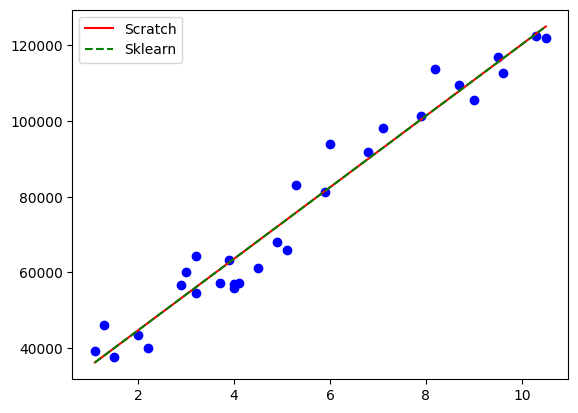

In [10]:
import matplotlib.pyplot as plt
plt.scatter(X, y, color="blue")
plt.plot(X, m*X + c, color="red", label="Scratch")
plt.plot(X, y_pred_sklearn, color="green", linestyle="--", label="Sklearn")
plt.legend()
plt.show()